In [1]:
pip install pandas matplotlib wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 9.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.9 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import json
from collections import Counter

Matplotlib is building the font cache; this may take a moment.


<h1>Análisis de la busqueda en X Cabify gana juicio a la comunidad de Madrid</h1>

In [4]:
df = pd.read_csv("twitter_search_cabify_gana_juicio_a_la_comunidad_de_madrid_28_05_2025.csv")



In [15]:
df.head()

,termino_busqueda,tipo_busqueda,url_tweet,usuario,handle,texto_tweet,fecha_tweet,retweets,likes,respuestas_count,vistas,tiene_media,cantidad_media,respuestas,fecha_extraccion
0,cabify gana juicio a la comunidad de madrid,top,https://x.com/EM_GranMadrid/status/19276715223...,El Mundo Gran Madrid,@desnocido,Los taxis de Madrid toman el centro de la capi...,2025-05-28T10:21:19.000Z,0,0,0,467,Sí,1,"{""reply_0"": {""usuario"": ""El Mundo Gran Madrid""...",2025-05-28 22:35:59
1,cabify gana juicio a la comunidad de madrid,top,https://x.com/Ritaalberdi/status/1927672228688...,Rita Ortega,@desnocido,"Yo, como usuaria, estoy con los taxistas. Sin ...",2025-05-28T10:24:08.000Z,0,0,0,103,Sí,1,"{""reply_0"": {""usuario"": ""unknown_user_0"", ""han...",2025-05-28 22:35:59
2,cabify gana juicio a la comunidad de madrid,top,https://x.com/MasMadrid__/status/1927622889747...,Más Madrid,@desnocido,8.500 nuevas licencias VTC a Cabify. Ayuso r...,2025-05-28T07:08:05.000Z,0,0,0,309,Sí,1,"{""reply_0"": {""usuario"": ""Más Madrid"", ""handle""...",2025-05-28 22:35:59
3,cabify gana juicio a la comunidad de madrid,top,https://x.com/telemadrid/status/19276891159416...,Telemadrid,@desnocido,"""Quieren eliminar el taxi""Miles de taxistas ma...",2025-05-28T11:31:14.000Z,0,0,0,71,Sí,1,"{""reply_0"": {""usuario"": ""unknown_user_0"", ""han...",2025-05-28 22:35:59
4,cabify gana juicio a la comunidad de madrid,top,https://x.com/el_pais/status/1927660026836971541,EL PAÍS,@desnocido,Cientos de taxistas cortan la Castellana y se ...,2025-05-28T09:35:39.000Z,0,0,0,1.7K,No,0,"{""reply_0"": {""usuario"": ""Tania C/"", ""handle"": ...",2025-05-28 22:35:59


In [5]:
# Stopwords personalizadas en español
stopwords_custom = {
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para", "con",
    "no", "una", "su", "al", "es", "lo", "como", "más", "pero", "sus", "le", "ya", "o", "este", "sí",
    "porque", "esta", "entre", "muy", "sin", "sobre", "también", "me", "hay", "donde", "todo", "nos",
    "uno", "ni", "otros", "ese", "eso", "ante", "ellos", "e", "esto", "mí", "antes", "yo", "él", "ella",
    "algo", "tú", "tu", "te", "cabify", "https", "tco"
}

In [6]:
# Función para limpiar texto
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", str(text))
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    return " ".join([w for w in text.split() if w not in stopwords_custom])

In [7]:
# Texto de los tweets originales
tweets_text = " ".join(df["texto_tweet"].dropna().astype(str).apply(clean_text))

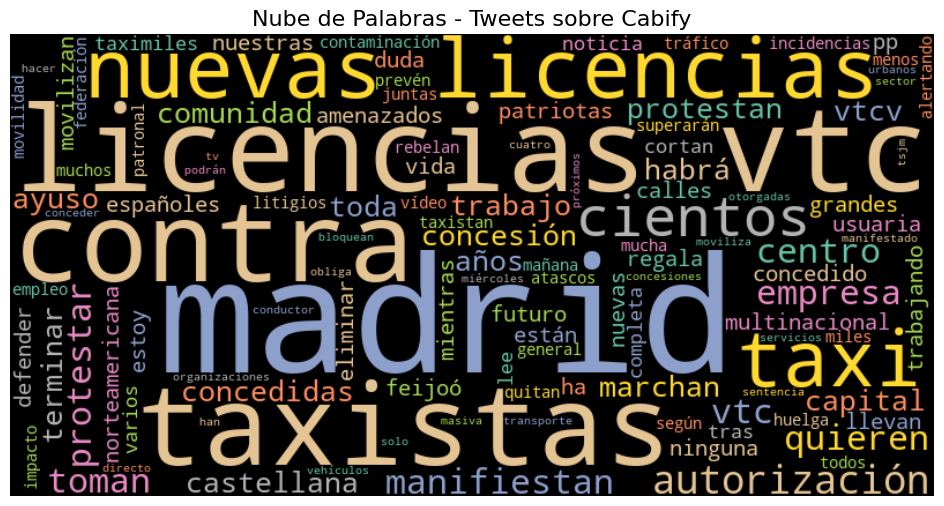

In [8]:
# Nube de palabras de tweets
wordcloud1 = WordCloud(width=800, height=400, background_color="black", colormap="Set2").generate(tweets_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Tweets sobre Cabify", fontsize=16)
plt.show()

In [9]:

# Extraer comentarios desde la columna 'respuestas'
def extract_response_texts(responses):
    all_texts = []
    for item in responses.dropna():
        try:
            parsed = json.loads(item)
            all_texts.extend([v.get("texto", "") for v in parsed.values() if "texto" in v])
        except:
            continue
    return all_texts

In [10]:
response_texts = extract_response_texts(df["respuestas"])
responses_cleaned = " ".join([clean_text(t) for t in response_texts])

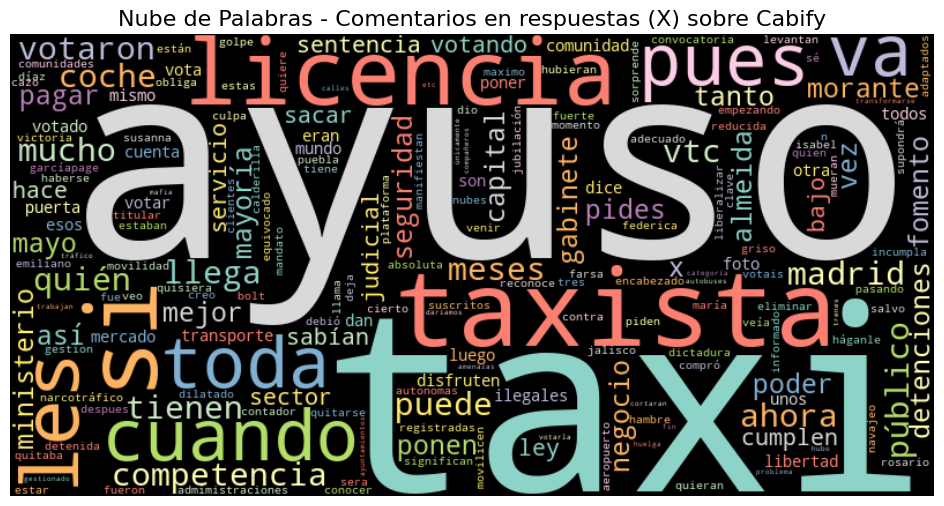

In [11]:
# Nube de palabras de comentarios (respuestas)
wordcloud2 = WordCloud(width=800, height=400, background_color="black", colormap="Set3").generate(responses_cleaned)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Comentarios en respuestas (X) sobre Cabify", fontsize=16)
plt.show()

In [12]:
# Top palabras más frecuentes
def top_words(text, n=10):
    return Counter(text.split()).most_common(n)


In [13]:
print("Top palabras en tweets:")
print(top_words(tweets_text))

Top palabras en tweets:
[('madrid', 14), ('licencias', 14), ('8500', 13), ('vtc', 13), ('nuevas', 10), ('taxistas', 9), ('contra', 9), ('taxis', 4), ('cientos', 4), ('autorización', 4)]


In [16]:
print("\nTop palabras en respuestas:")
print(top_words(responses_cleaned))


Top palabras en respuestas:
[('ayuso', 10), ('si', 7), ('licencias', 6), ('taxi', 6), ('taxistas', 6), ('les', 5), ('va', 4), ('cuando', 4), ('pues', 4), ('todas', 3)]


<h1>Análisis de la busqueda en X Manifestación de taxis españa VTC</h1>

In [17]:
df1 = pd.read_csv("twitter_search_Manifestación_de_taxis_españa_VTC_28_05_2025.csv")



In [18]:
df1.head()

,termino_busqueda,tipo_busqueda,url_tweet,usuario,handle,texto_tweet,fecha_tweet,retweets,likes,respuestas_count,vistas,tiene_media,cantidad_media,respuestas,fecha_extraccion
0,Manifestación de taxis españa VTC,top,https://x.com/La_SER/status/1927651475406148078,Cadena SER,@desnocido,Centenares de taxis cortan varios kilómetros d...,2025-05-28T09:01:40.000Z,0,0,0,506,Sí,2,"{""reply_0"": {""usuario"": ""Sol García Vives"", ""h...",2025-05-28 23:04:35
1,Manifestación de taxis españa VTC,top,https://x.com/Ritaalberdi/status/1927672228688...,Rita Ortega,@desnocido,"Yo, como usuaria, estoy con los taxistas. Sin ...",2025-05-28T10:24:08.000Z,0,0,0,0,Sí,1,"{""reply_0"": {""usuario"": ""unknown_user_0"", ""han...",2025-05-28 23:04:35
2,Manifestación de taxis españa VTC,top,https://x.com/Mariluzfri/status/19276709607583...,Mariluz,@desnocido,"8500 Vtc para una sola empresa, pero yo que te...",2025-05-28T10:19:06.000Z,0,0,0,18,Sí,1,"{""reply_0"": {""usuario"": ""S"", ""handle"": ""@unkno...",2025-05-28 23:04:35
3,Manifestación de taxis españa VTC,top,https://x.com/gacetadeltaxi/status/19276477157...,gacetadeltaxi.com,@desnocido,Cientos de taxis se dan cita hoy en Madrid par...,2025-05-28T08:46:44.000Z,0,0,0,80,Sí,2,"{""reply_0"": {""usuario"": ""gacetadeltaxi.com"", ""...",2025-05-28 23:04:35
4,Manifestación de taxis españa VTC,top,https://x.com/el_pais/status/1927660026836971541,EL PAÍS,@desnocido,Cientos de taxistas cortan la Castellana y se ...,2025-05-28T09:35:39.000Z,0,0,0,1.7K,No,0,"{""reply_0"": {""usuario"": ""Tania C/"", ""handle"": ...",2025-05-28 23:04:35


In [19]:
# Stopwords personalizadas en español
stopwords_custom = {
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para", "con",
    "no", "una", "su", "al", "es", "lo", "como", "más", "pero", "sus", "le", "ya", "o", "este", "sí",
    "porque", "esta", "entre", "muy", "sin", "sobre", "también", "me", "hay", "donde", "todo", "nos",
    "uno", "ni", "otros", "ese", "eso", "ante", "ellos", "e", "esto", "mí", "antes", "yo", "él", "ella",
    "algo", "tú", "tu", "te", "cabify", "https", "tco"
}

In [20]:
# Texto de los tweets originales
tweets_text = " ".join(df1["texto_tweet"].dropna().astype(str).apply(clean_text))

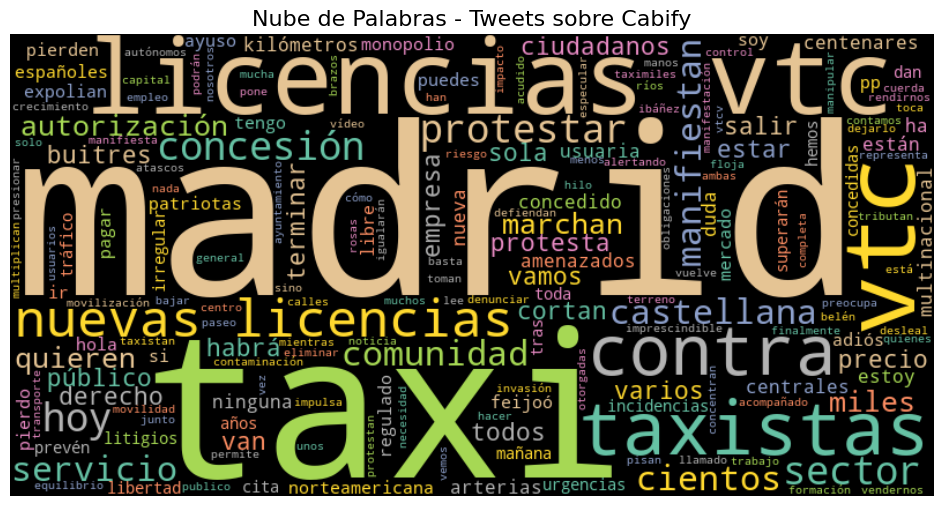

In [21]:
# Nube de palabras de tweets
wordcloud1 = WordCloud(width=800, height=400, background_color="black", colormap="Set2").generate(tweets_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Tweets sobre Cabify", fontsize=16)
plt.show()